<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vortex-moments-calculation" data-toc-modified-id="Vortex-moments-calculation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vortex-moments calculation</a></span></li></ul></div>

In [41]:
import xarray as xr
import cfgrib
import pandas as pd
import glob
import numpy as np
from scipy.interpolate import griddata  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [9]:
ds = cfgrib.open_file('CMC_geps-raw_HGT_ISBL_0010_latlon0p5x0p5_2018122000_P768_allmbrs.grib2', \
                      filter_by_keys={'dataType': 'cf'})

Ignoring index file 'CMC_geps-raw_HGT_ISBL_0010_latlon0p5x0p5_2018122000_P768_allmbrs.grib2.5b385.idx' incompatible with GRIB file


In [56]:
infiles = sorted(glob.glob('CMC_geps-raw_HGT_ISBL_0010_latlon0p5x0p5_2018122200_*_allmbrs.grib2'))
len(infiles)

65

In [60]:
ds_ls = []
for infile in infiles:
    ds = cfgrib.xarray_store.open_datasets(infile, \
                           backend_kwargs={'errors': 'ignore'})[1]
    ds_ls.append(ds)
    
ds_all = xr.concat(ds_ls, dim='valid_time')

/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

In [61]:
ds_all

<xarray.Dataset>
Dimensions:        (latitude: 361, longitude: 720, number: 20, valid_time: 65)
Coordinates:
  * number         (number) int64 1 2 3 4 5 6 7 8 9 ... 13 14 15 16 17 18 19 20
    time           datetime64[ns] 2018-12-22
    isobaricInhPa  int64 10
  * latitude       (latitude) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude      (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    step           (valid_time) timedelta64[ns] 0 days 00:00:00 ... 16 days 00:00:00
  * valid_time     (valid_time) datetime64[ns] 2018-12-22 ... 2019-01-07
Data variables:
    gh             (valid_time, number, latitude, longitude) float32 31915.0 ... 30950.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal 
    GRIB_subCentre:          0
    history:                 GRIB to CDM+CF via cfgrib-0.9.4.2/ecCodes-2.6.0 ...

In [27]:
ds_all['time'] = pd.date_range('2018-12-22-06', periods=ds_all.time.shape[0], freq='6H')

In [62]:
ds_all.gh.to_netcdf('GH_GEPS_init2018122200_fd16.nc')

In [64]:
ds_all_daily = ds_all.resample(valid_time = '1D').mean('valid_time')
#ds_h_sel_daily = ds_h_sel_daily.reset_coords(drop=True)
ds_all_daily = ds_all_daily.sel(latitude = slice(20,None))
#ds_h_sel_daily = ds_h_sel_daily.rename({'time1': 'time'})
ds_all_daily

<xarray.Dataset>
Dimensions:        (latitude: 141, longitude: 720, number: 20, valid_time: 17)
Coordinates:
  * valid_time     (valid_time) datetime64[ns] 2018-12-22 ... 2019-01-07
  * number         (number) int64 1 2 3 4 5 6 7 8 9 ... 13 14 15 16 17 18 19 20
    time           datetime64[ns] 2018-12-22
    isobaricInhPa  int64 10
  * latitude       (latitude) float64 20.0 20.5 21.0 21.5 ... 89.0 89.5 90.0
  * longitude      (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
Data variables:
    gh             (valid_time, number, latitude, longitude) float32 30741.75 ... 30950.0

In [40]:
 ds_all_daily.gh[-1]

<xarray.DataArray 'gh' (number: 20, latitude: 141, longitude: 720)>
array([[[30808., 30807., ..., 30808., 30808.],
        [30805., 30805., ..., 30805., 30805.],
        ...,
        [30035., 30035., ..., 30035., 30035.],
        [30037., 30037., ..., 30037., 30037.]],

       [[30864., 30863., ..., 30865., 30864.],
        [30860., 30859., ..., 30861., 30860.],
        ...,
        [30202., 30202., ..., 30202., 30202.],
        [30203., 30203., ..., 30203., 30203.]],

       ...,

       [[30895., 30895., ..., 30897., 30895.],
        [30894., 30894., ..., 30895., 30895.],
        ...,
        [30583., 30583., ..., 30583., 30583.],
        [30602., 30602., ..., 30602., 30602.]],

       [[30890., 30890., ..., 30892., 30891.],
        [30887., 30886., ..., 30888., 30887.],
        ...,
        [29755., 29755., ..., 29753., 29755.],
        [29766., 29766., ..., 29766., 29766.]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 2019-01-21
  * number         (number) int64 

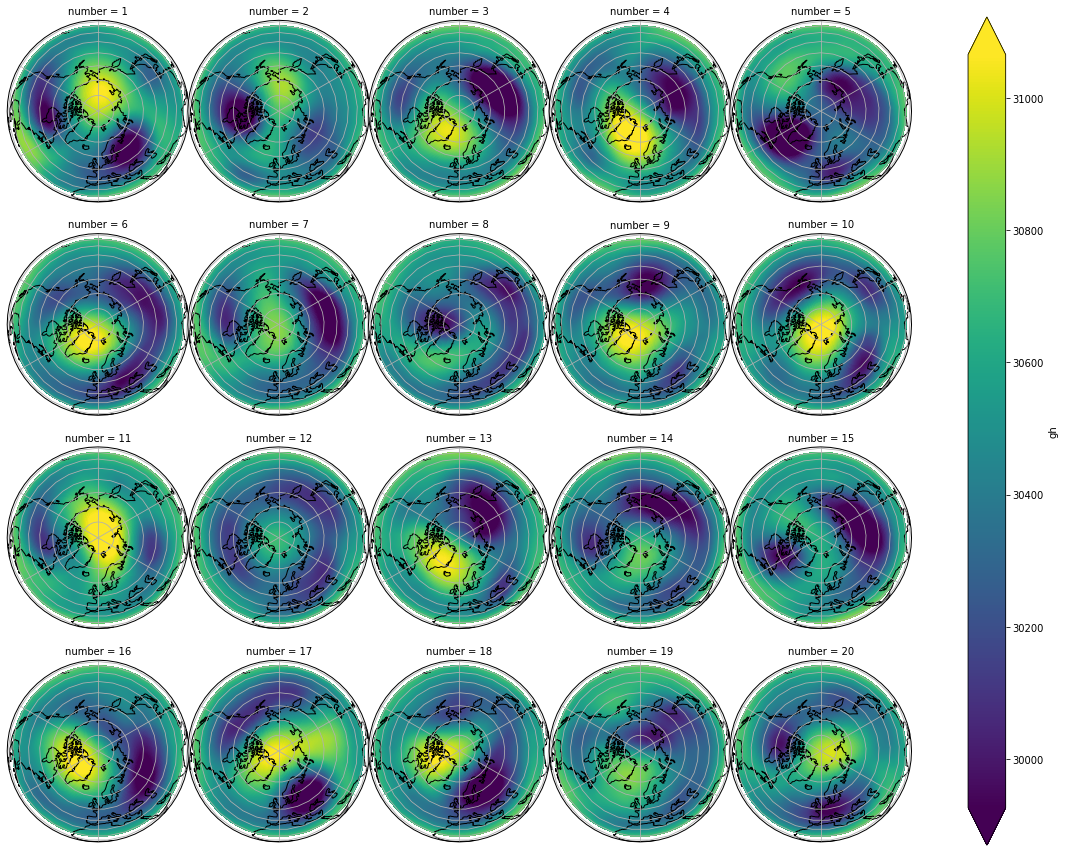

In [65]:
p = ds_all_daily.gh[-1].plot(col = 'number', col_wrap = 5,\
                        transform=ccrs.PlateCarree(), robust = True,\
                        subplot_kws={'projection': ccrs.Orthographic(0, 90)})
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()

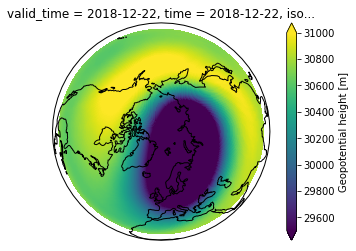

In [67]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ds_all_daily.gh[0].mean('number').plot(ax=ax, transform=ccrs.PlateCarree(), \
                                   vmax = 31000, vmin = 29500, \
                                   cbar_kwargs=dict(label = 'Geopotential height [m]'));
ax.set_global(); ax.coastlines();
#plt.savefig('GH_GEFS_init2018121006_fd00.png', dpi=300, bbox_inches='tight')

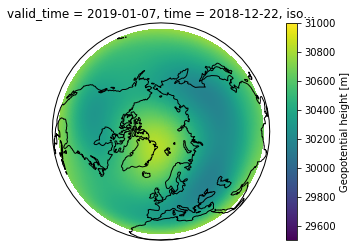

In [68]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ds_all_daily.gh[-1].mean('number').plot(ax=ax, transform=ccrs.PlateCarree(), \
                                   vmax = 31000, vmin = 29500, \
                                   cbar_kwargs=dict(label = 'Geopotential height [m]'));
ax.set_global(); ax.coastlines();
#plt.savefig('GH_GEFS_init2018121006_fd00.png', dpi=300, bbox_inches='tight')

# Vortex-moments calculation

In [47]:
A = 6374.0e3       # Earth radius
DEGRAD = np.pi/180. # conversion of degrees to radians
RADDEG = 180./np.pi # conversion of radians to degrees 

#optimized
def sph_to_car(field, lons, lats, xypoints,resolution):
    nlons = len(lons)
    nlats = len(lats)
    xyvals = []
    for ilon in range(nlons): # -1s needed?
        for ilat in range(nlats):
            xyvals.append(field[ilat,ilon])

    if resolution == 'full':       
        cart_x_points = -1.+np.arange(nlons)/(0.5*nlons)             
        cart_y_points = -1.+np.arange(nlons)/(0.5*nlons)
    elif resolution == 'low':
        cart_x_points = -1.+np.arange(50)/(0.5*50)
        cart_y_points = -1.+np.arange(50)/(0.5*50)
    else:
        raise ValueError()
    
    cart_gridx, cart_gridy = np.meshgrid(cart_x_points,cart_y_points)

    field_cart = griddata(xypoints, np.array(xyvals), (cart_gridx,cart_gridy), \
                        method='linear')  # Might want to change to cubic etc?
                              
    return field_cart, cart_x_points, cart_y_points  
#the same
def isolate_vortex(field_cart, edge, field_type='GPH'):
    """
    Replace vortex into region (outside) equal to field on vortex edge, and 
    region (inside) with values of vortex. 
    For GPH vortex is less than surrounding, for PV it is greater. 
    """
    if field_type == 'GPH':
        field_cart[np.where(field_cart > edge)] = edge
        field_cart[np.isnan(field_cart)] = edge # set NaN regions to edge 
    elif field_type == 'PV':
        field_cart[np.where(field_cart < edge)] = edge
        field_cart[np.isnan(field_cart)] = edge # set NaN regions to edge
    else:
        raise ValueError() # maybe want more specific error type

    return field_cart

def moment_integrate2(vtx_field, x, y,edge):
    """
    Performs moment diagnostic calculations on cartesian field
    """

    # x and y are cartesian gridpoints; vtx_field is cartesian field
    # edge is value on vortex edge 

    box_length = 2*A/len(x)
    box_area = box_length**2

    # Set up moment diagnostics
    M00 = 0
    M10 = 0
    M01 = 0
    Marea = 0
    # Integrate over vortex
          
    M00 = np.sum(np.abs(vtx_field-edge)*(x[:,np.newaxis]**0)*(y[np.newaxis,:]**0))
    M10 = np.sum(np.abs(vtx_field-edge)*(x[:,np.newaxis]**1)*(y[np.newaxis,:]**0))
    M01 = np.sum(np.abs(vtx_field-edge)*(x[:,np.newaxis]**0)*(y[np.newaxis,:]**1))
    Marea = np.sum(np.abs(vtx_field-edge)*(x[:,np.newaxis]**0)*(y[np.newaxis,:]**0)*box_area)
            
    # Calculate centroid 
    centx = M10/M00
    centy = M01/M00

    # Convert back to polar coordinates 
    R = centx**2 + centy**2
    latcent = np.arcsin((1-R)/(1+R))*RADDEG
    
    # Set up relative moment diagnostics 
    J11 = np.sum(np.abs(vtx_field-edge)*((x[:,np.newaxis]-centx)**1)*((y[np.newaxis,:]-centy)**1))
    J20 = np.sum(np.abs(vtx_field-edge)*((x[:,np.newaxis]-centx)**2)*((y[np.newaxis,:]-centy)**0))
    J02 = np.sum(np.abs(vtx_field-edge)*((x[:,np.newaxis]-centx)**0)*((y[np.newaxis,:]-centy)**2))
    aspect_ratio = np.sqrt(abs(( (J20+J02) + np.sqrt(4*(J11**2)+(J20-J02)**2) ) / \
                               ( (J20+J02) - np.sqrt(4*(J11**2)+(J20-J02)**2) ))) 
    return aspect_ratio, latcent

def calc_j_moment(vtx_field, x, y, order):
    J = np.sum(np.abs(vtx_field-edge)*((x[:,np.newaxis]-centx)**1)*((y[np.newaxis,:]-centy)**order))
    return J

def calc_moments(field, lats, lons, xypoints, hemisphere='NH', field_type='GPH', \
                 edge=3.02e4, resolution='full'):
    field_cart, x, y = sph_to_car(field,lons,lats,xypoints,resolution)
    field_vtx = isolate_vortex(field_cart, edge, field_type)
   
    aspect_ratio, latcent = moment_integrate2(field_vtx, x, y,edge)
        
    return {'aspect_ratio':aspect_ratio, 'centroid_latitude':latcent}
                 
def calc_xypoints(lons, lats):
    DEGRAD = np.pi/180.
    lons = lons * DEGRAD
    lats = lats * DEGRAD
    x = (np.cos(lons[:,np.newaxis])*np.cos(lats))/ (1. + np.sin(lats[np.newaxis,:]))               
    y = (np.sin(lons[:,np.newaxis])*np.cos(lats[np.newaxis,:]))/(1. + np.sin(lats[np.newaxis,:]))
    nlon_nlat = lons.shape[0]*lats.shape[0]
    xypoints = np.stack([x.reshape(nlon_nlat),y.reshape(nlon_nlat)], axis = 1)
    return xypoints
                 
def moments_fce(arr):
    moments = calc_moments(arr,lats,lons,xypoints,'NH','GPH',3.02e4)
    return np.array([moments['aspect_ratio'], moments['centroid_latitude']])

In [69]:
lons = ds_all_daily.longitude.values
lats = ds_all_daily.latitude.values
xypoints = calc_xypoints(lons,lats)

In [70]:
moments_xr = xr.apply_ufunc(moments_fce, ds_all_daily.gh.chunk({'valid_time': 1}), \
                            input_core_dims=[['latitude', 'longitude']], \
                            output_core_dims=[['vars']], \
                            output_dtypes = [float], vectorize=True, \
                            dask = 'parallelized',\
                            output_sizes = dict(vars = 2)).compute()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater


In [71]:
moments_xr['vars'] = ['aspect_ratio', 'centroid_latitude']#.reset_coords()
moments_ds = moments_xr.to_dataset(dim = 'vars') #.reset_coords('vars')

In [73]:
plt.rcParams.update({'font.size': 18})


In [74]:
moments_ds

<xarray.Dataset>
Dimensions:            (number: 20, valid_time: 17)
Coordinates:
  * valid_time         (valid_time) datetime64[ns] 2018-12-22 ... 2019-01-07
  * number             (number) int64 1 2 3 4 5 6 7 8 ... 14 15 16 17 18 19 20
    time               datetime64[ns] 2018-12-22
    isobaricInhPa      int64 10
Data variables:
    aspect_ratio       (valid_time, number) float64 1.591 1.582 ... 2.209 3.378
    centroid_latitude  (valid_time, number) float64 70.92 70.6 ... 67.99 60.85

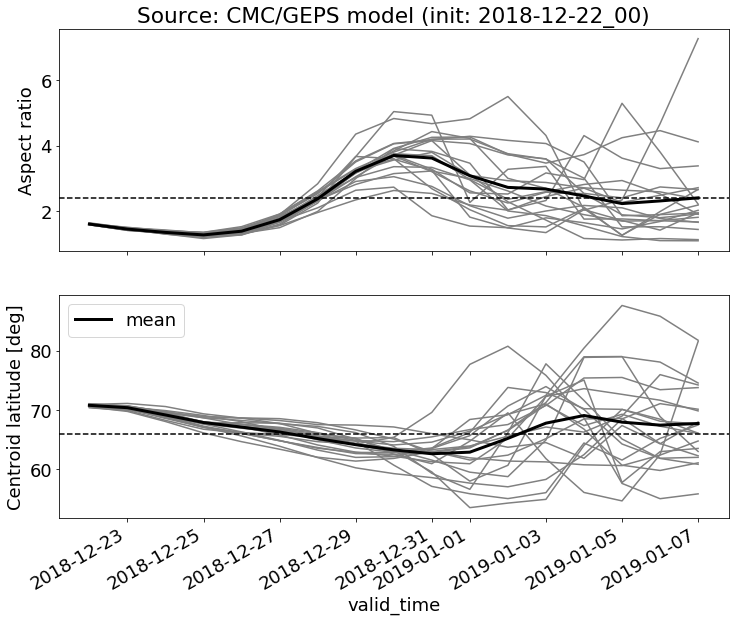

In [91]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharex=True)
p1 = moments_ds.aspect_ratio.plot.line(hue = 'number', add_legend = False, color = 'grey', ax=ax1)
p2 = moments_ds.aspect_ratio.mean('number').plot(color = 'k', linewidth = 3, label = 'mean', ax=ax1)
ax1.set_xlabel('')
ax1.axhline(2.4, color='k', linestyle='--' )
ax1.set_ylabel('Aspect ratio')
init = '2018-12-22_00'

ax1.set_title('Source: CMC/GEPS model (init: {})'.format(init))

p1 = moments_ds.centroid_latitude.plot.line(hue = 'number', add_legend = False, color = 'grey', ax=ax2)
p2 = moments_ds.centroid_latitude.mean('number').plot(color = 'k', linewidth = 3, label = 'mean', ax=ax2)
ax2.axhline(66, color='k', linestyle='--' )
ax2.set_ylabel('Centroid latitude [deg]')
ax2.set_title('')

plt.legend()
plt.savefig('vort_moments_GEPS_init{}.png'.format(init), dpi=300, bbox_inches='tight')

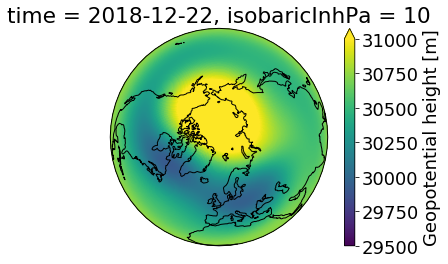

In [90]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ds_all.gh.sel(valid_time = '2018-12-30').mean(['valid_time', 'number']).plot(ax=ax, transform=ccrs.PlateCarree(), \
                                   vmax = 31000, vmin = 29500, \
                                   cbar_kwargs=dict(label = 'Geopotential height [m]'));
ax.set_global(); ax.coastlines();
#plt.savefig('GH_GEFS_init2018121006_fd00.png', dpi=300, bbox_inches='tight')

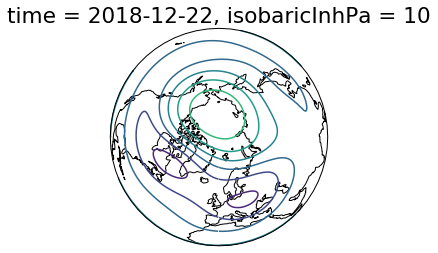

In [89]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ds_all.gh.sel(valid_time = '2018-12-30').mean(['valid_time', 'number']).plot.contour(ax=ax, levels = 11, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();
#plt.savefig('GH_GEFS_init2018121006_fd00.png', dpi=300, bbox_inches='tight')